In [ ]:

import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, Normalizer
from sklearn.impute import KNNImputer


In [ ]:
# leer
mdf = pd.read_csv('/content/datos_marketing.csv')

### **Exploración Inicial**


In [ ]:
# head, tail, info
mdf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,no,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,no,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,no,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,no,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,no,0


In [ ]:
mdf.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,9,3,4,no,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,8,2,5,no,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,2,3,13,no,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,6,5,10,no,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,84,3,61,2,1,21,3,1,4,no,0


In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [ ]:
mdf.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmps
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,4.084821,2.662054,5.790179,0.297768
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,2.778714,2.923101,3.250958,0.678381
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,4.000000


In [ ]:
mdf.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'Complain', 'AcceptedCmps'],
      dtype='object')

In [ ]:
mdf.columns = mdf.columns.str.lower()

In [ ]:
mdf.columns

Index(['id', 'education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'dt_customer', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'complain', 'acceptedcmps', 'edad', 'cat_edad'],
      dtype='object')

In [ ]:
mdf['edad'] = 2023 - mdf['year_birth']
mdf['edad'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: edad, dtype: float64

In [ ]:
def function2(row):
  edad = row['edad']
  if edad <= 35:
    return 'adulto joven'
  elif edad <= 53:
    return 'adulto'
  else:
    return 'adulto mayor'

mdf['cat_edad'] = mdf.apply(function2, axis=1)
mdf['cat_edad'].describe()


count             2240
unique               3
top       adulto mayor
freq              1076
Name: cat_edad, dtype: object

In [ ]:
mdf.drop(columns=['year_birth'], inplace=True)
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   education            2240 non-null   object 
 2   marital_status       2240 non-null   object 
 3   income               2216 non-null   float64
 4   kidhome              2240 non-null   int64  
 5   teenhome             2240 non-null   int64  
 6   dt_customer          2240 non-null   object 
 7   mntwines             2240 non-null   int64  
 8   mntfruits            2240 non-null   int64  
 9   mntmeatproducts      2240 non-null   int64  
 10  mntfishproducts      2240 non-null   int64  
 11  mntsweetproducts     2240 non-null   int64  
 12  mntgoldprods         2240 non-null   int64  
 13  numwebpurchases      2240 non-null   int64  
 14  numcatalogpurchases  2240 non-null   int64  
 15  numstorepurchases    2240 non-null   i

In [ ]:
mdf.describe()

,id,income,kidhome,teenhome,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,acceptedcmps,edad
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,4.084821,2.662054,5.790179,0.297768,54.194196
std,3246.662198,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,2.778714,2.923101,3.250958,0.678381,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,2828.250000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.000000,46.000000
50%,5458.500000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,0.000000,53.000000
75%,8427.750000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,0.000000,64.000000
max,11191.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,4.000000,130.000000


In [ ]:
mdf.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239],
           dtype='int64', length=2240)

In [ ]:
mdf.shape

(2240, 19)

### **Limpieza de datos**


*   Datos nulos



In [ ]:
mdf.isna().sum()

id                      0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
complain                0
acceptedcmps            0
edad                    0
dtype: int64

In [ ]:
mdf['income'].fillna(mdf['income'].mean(), inplace=True)

In [ ]:
mdf.isna().sum()

id                     0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
complain               0
acceptedcmps           0
edad                   0
dtype: int64



*   Datos atipicos



In [ ]:
q1 = mdf['income'].quantile(.25)
q3 = mdf['income'].quantile(.75)
IQR = q3 - q1
lim_sup = q3 + 1.5 * IQR
lim_inf = q1 - 1.5 * IQR

mdf = mdf[(mdf['income'] >= lim_inf) & (mdf['income'] <= lim_sup)]
mdf['income'].describe()

count      2232.000000
mean      51640.236126
std       20601.760369
min        1730.000000
25%       35434.750000
50%       51566.000000
75%       68118.000000
max      113734.000000
Name: income, dtype: float64

In [ ]:
q1 = mdf['edad'].quantile(.25)
q3 = mdf['edad'].quantile(.75)
IQR = q3 - q1
lim_sup = q3 + 1.5 * IQR
lim_inf = q1 - 1.5 * IQR

mdf = mdf[(mdf['edad'] >= lim_inf) & (mdf['edad'] <= lim_sup)]
mdf['edad'].describe()

count    2229.000000
mean       54.111261
std        11.707430
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: edad, dtype: float64



*   Datos duplicados implícitos



In [ ]:
lista_cat = ['education', 'marital_status', 'complain']

In [ ]:
for col in lista_cat:
  print(mdf[col].value_counts())

Graduation    1124
PhD            481
Master         369
2n Cycle       201
Basic           54
Name: education, dtype: int64
Married     861
Together    575
Single      479
Divorced    230
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64
no     2209
yes      20
Name: complain, dtype: int64


In [ ]:
mdf.replace({'marital_status':{'Together':'Married', 'Alone':'Single', 'Absurd':'Single', 'YOLO':'Single'}}, inplace=True)

*   Datos duplicados explícitos




In [ ]:
mdf = mdf.drop_duplicates()

In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2229 non-null   int64         
 1   education            2229 non-null   object        
 2   marital_status       2229 non-null   object        
 3   income               2229 non-null   float64       
 4   kidhome              2229 non-null   int64         
 5   teenhome             2229 non-null   int64         
 6   dt_customer          2229 non-null   datetime64[ns]
 7   mntwines             2229 non-null   int64         
 8   mntfruits            2229 non-null   int64         
 9   mntmeatproducts      2229 non-null   int64         
 10  mntfishproducts      2229 non-null   int64         
 11  mntsweetproducts     2229 non-null   int64         
 12  mntgoldprods         2229 non-null   int64         
 13  numwebpurchases      2229 non-nul



*   Tipos de datos



In [ ]:
mdf['dt_customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: dt_customer, Length: 2229, dtype: datetime64[ns]

In [ ]:
mdf['dt_customer'] = pd.to_datetime(mdf['dt_customer'], format='%d-%m-%Y')

In [ ]:
mdf['year_customer'] = mdf['dt_customer'].dt.year

In [ ]:
mdf['education'] = mdf['education'].astype('category')
mdf['marital_status'] = mdf['marital_status'].astype('category')
mdf['complain'] = mdf['complain'].astype('category')

In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2229 non-null   int64         
 1   education            2229 non-null   category      
 2   marital_status       2229 non-null   category      
 3   income               2229 non-null   float64       
 4   kidhome              2229 non-null   int64         
 5   teenhome             2229 non-null   int64         
 6   dt_customer          2229 non-null   datetime64[ns]
 7   mntwines             2229 non-null   int64         
 8   mntfruits            2229 non-null   int64         
 9   mntmeatproducts      2229 non-null   int64         
 10  mntfishproducts      2229 non-null   int64         
 11  mntsweetproducts     2229 non-null   int64         
 12  mntgoldprods         2229 non-null   int64         
 13  numwebpurchases      2229 non-nul

### **Enriquecimiento**



*   Categorización de variables



In [ ]:
def function2(row):
  edad = row['edad']
  if edad <= 35:
    return 'adulto joven'
  elif edad <= 53:
    return 'adulto'
  else:
    return 'adulto mayor'

mdf['cat_age'] = mdf.apply(function2, axis=1)
mdf['cat_age'].describe()

count             2229
unique               3
top       adulto mayor
freq              1072
Name: cat_age, dtype: object

In [ ]:
mdf['cat_income'] = pd.cut(mdf['income'], 4, labels=['Muy bajo', 'Bajo', 'Medio', 'Alto'])
mdf['cat_kids'] = np.where(mdf['kidhome']>0, 'si', 'no')
mdf['cat_teens'] = np.where(mdf['teenhome']>0, 'si', 'no')

In [ ]:
mdf.drop(columns=['cat_edad', 'cat_niños'], inplace=True)



*   Creación de variables

In [ ]:
mdf['underagehome'] = mdf['kidhome'] + mdf['teenhome']

In [ ]:
mdf['groseries'] = mdf['mntfruits'] + mdf['mntmeatproducts'] + mdf['mntfishproducts'] + mdf['mntsweetproducts']

In [ ]:
mdf['purchases'] = mdf['numwebpurchases'] + mdf['numcatalogpurchases'] + mdf['numstorepurchases']

In [ ]:
mdf

,id,education,marital_status,income,kidhome,teenhome,dt_customer,mntwines,mntfruits,mntmeatproducts,...,acceptedcmps,edad,year_customer,cat_income,cat_age,cat_kids,cat_teens,underagehome,groseries,purchases
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,635,88,546,...,0,66,2012,Medio,adulto mayor,no,no,0,894,22
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,11,1,6,...,0,69,2014,Bajo,adulto mayor,si,si,2,10,4
2,4141,Graduation,Married,71613.0,0,0,2013-08-21,426,49,127,...,0,58,2013,Medio,adulto mayor,no,no,0,308,20
3,6182,Graduation,Married,26646.0,1,0,2014-02-10,11,4,20,...,0,39,2014,Muy bajo,adulto,si,no,1,37,6
4,5324,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,...,0,42,2014,Medio,adulto,si,no,1,234,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,709,43,182,...,0,56,2013,Medio,adulto mayor,no,si,1,385,16
2236,4001,PhD,Married,64014.0,2,1,2014-06-10,406,0,30,...,1,77,2014,Medio,adulto mayor,si,si,3,30,15
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,908,48,217,...,1,42,2014,Bajo,adulto,no,no,0,309,18
2238,8235,Master,Married,69245.0,0,1,2014-01-24,428,30,214,...,0,67,2014,Medio,adulto mayor,no,si,1,354,21


In [ ]:
mdf['cat_age'] = mdf['cat_age'].astype('category')
mdf['cat_kids'] = mdf['cat_kids'].astype('category')
mdf['cat_teens'] = mdf['cat_teens'].astype('category')

In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2229 non-null   int64         
 1   education            2229 non-null   category      
 2   marital_status       2229 non-null   category      
 3   income               2229 non-null   float64       
 4   kidhome              2229 non-null   int64         
 5   teenhome             2229 non-null   int64         
 6   dt_customer          2229 non-null   datetime64[ns]
 7   mntwines             2229 non-null   int64         
 8   mntfruits            2229 non-null   int64         
 9   mntmeatproducts      2229 non-null   int64         
 10  mntfishproducts      2229 non-null   int64         
 11  mntsweetproducts     2229 non-null   int64         
 12  mntgoldprods         2229 non-null   int64         
 13  numwebpurchases      2229 non-nul

### **Exploración estadística**



*   Numérico



In [ ]:
mdf.describe()

,id,income,kidhome,teenhome,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,acceptedcmps,edad,year_customer
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,5589.296097,51628.825945,0.444594,0.507402,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,4.100045,2.636608,5.812472,0.298789,54.111261,2013.027367
std,3244.840538,20601.302353,0.538636,0.544735,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,2.775461,2.796161,3.242144,0.679597,11.707430,0.684966
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,2012.000000
25%,2829.000000,35416.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.000000,46.000000,2013.000000
50%,5455.000000,51563.000000,0.000000,0.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,0.000000,53.000000,2013.000000
75%,8420.000000,68118.000000,1.000000,1.000000,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000,6.000000,4.000000,8.000000,0.000000,64.000000,2013.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,4.000000,83.000000,2014.000000




*   Categórico



In [ ]:
mdf[mdf.select_dtypes('category').columns].describe()

,education,marital_status,complain,cat_income,cat_age,cat_kids,cat_teens
count,2229,2229,2229,2229,2229,2229,2229
unique,5,4,2,4,3,2,2
top,Graduation,Married,no,Bajo,adulto mayor,no,no
freq,1124,1436,2209,965,1072,1286,1150


### **Exploración grafica**

In [ ]:
import seaborn as sns
import pandas as pd



*   Numérica



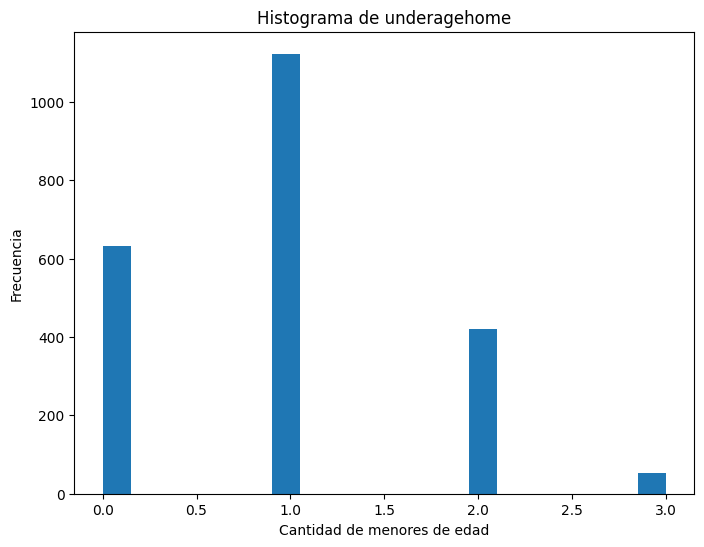

In [ ]:
gráfica_1 = ['underagehome']

for col in gráfica_1:
  plt.figure(figsize=(8, 6))
  plt.hist(mdf[col], bins=20)
  plt.title(f'Histograma de {col}')
  plt.xlabel('Cantidad de menores de edad')
  plt.ylabel('Frecuencia')
  plt.show()

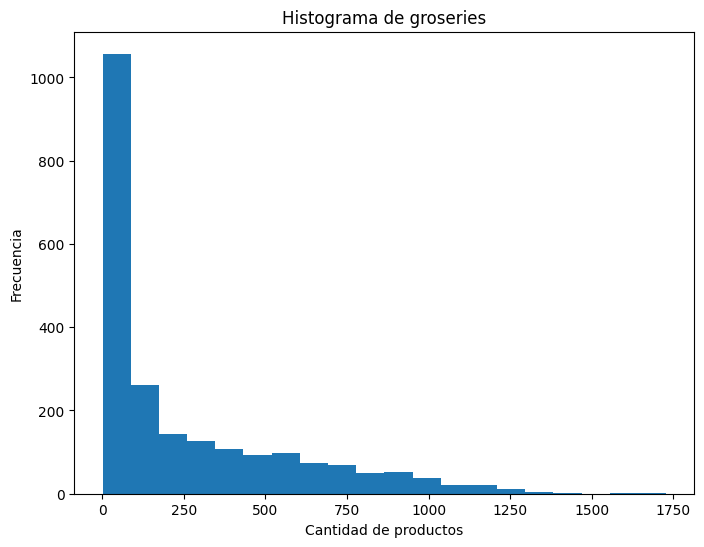

In [ ]:
gráfica_1 = ['groseries']

for col in gráfica_1:
  plt.figure(figsize=(8, 6))
  plt.hist(mdf[col], bins=20)
  plt.title(f'Histograma de {col}')
  plt.xlabel('Cantidad de productos')
  plt.ylabel('Frecuencia')
  plt.show()

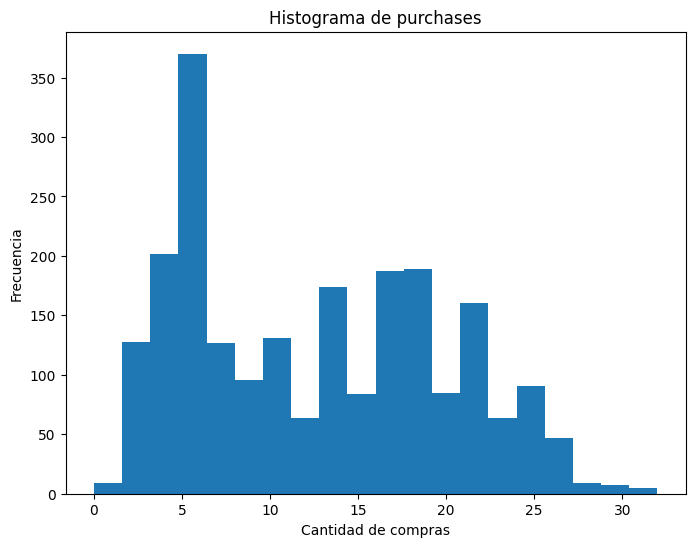

In [ ]:
gráfica_1 = ['purchases']

for col in gráfica_1:
  plt.figure(figsize=(8, 6))
  plt.hist(mdf[col], bins=20)
  plt.title(f'Histograma de {col}')
  plt.xlabel('Cantidad de compras')
  plt.ylabel('Frecuencia')
  plt.show()



*   Categórica



<ipython-input-190-7598d6f105c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mdf.corr())


<Axes: >

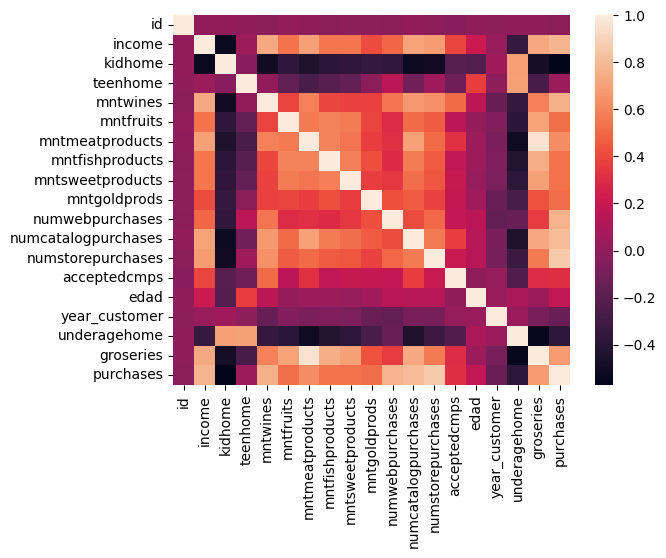

In [ ]:
sns.heatmap(mdf.corr())

### **Segmentación y conclusiones**

In [ ]:
mdf.pivot_table(index=['cat_age'], values='mntgoldprods', aggfunc='mean')

,mntgoldprods
cat_age,
adulto,39.385728
adulto joven,50.008333
adulto mayor,48.026119


In [ ]:
from statistics import mode

<Axes: ylabel='cat_age'>

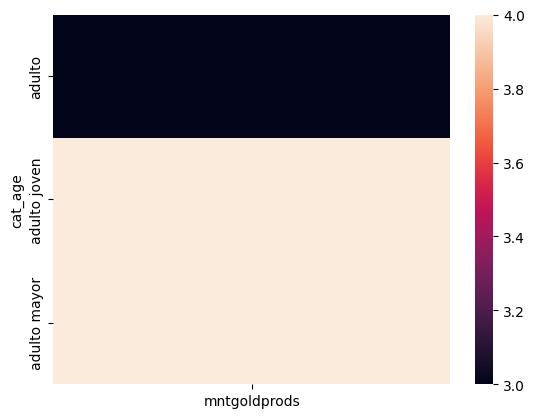

In [ ]:
sns.heatmap(mdf.pivot_table(index=['cat_age'], values=['mntgoldprods'], aggfunc=mode))

De acuerdo a lo anterior, es posible identificar que el adulto jóven es quien más tiene consumo de productos suntuosos, seguido del adulto mayor por una diferencia mínima, mientras que se identifica que el adulto es quien menos consume este tipo de producto.

**Conclusión:**



In [ ]:
mdf.pivot_table(index=['cat_age', 'cat_income'], values='purchases', aggfunc='mean')

purchases
cat_age      cat_income           
adulto       Muy bajo     5.185841
             Bajo         8.709130
             Medio       18.745098
             Alto        20.941176
adulto joven Muy bajo     5.105263
             Bajo         8.645161
             Medio       19.552632
             Alto        19.846154
adulto mayor Muy bajo     5.474747
             Bajo        10.198704
             Medio       18.625523
             Alto        19.375000

<Axes: ylabel='cat_age-cat_income'>

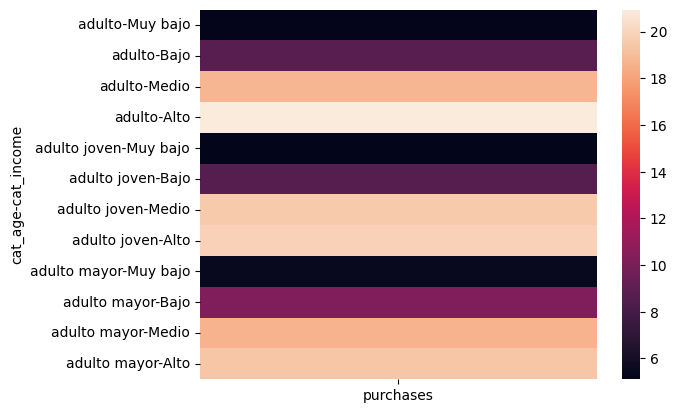

In [ ]:
sns.heatmap(mdf.pivot_table(index=['cat_age', 'cat_income'], values='purchases', aggfunc='mean'))

Se crearon las variables categorizadas de edad por adulto, adulto joven y adulto mayor, junto con la categorización de la variable ingreso, considerando los niveles Muy bajo, Bajo, Medio y Alto, además de la suma de compras que involucra consumo por web, catálogo y tienda, para lograr sectorizar la población qué mas realiza compras, dependiendo de las variables categorizadas de ingreso y edad.

Es así como se logra identificar que la categoría de edad que más se involucra en este mercado son los adultos con ingreso alto, seguido de adultos jovenes y adulto mayor, aunque se precisa que las diferencias no son tan significativas, lo cual permite concluir que en los 3 rangos de edad el ingreso alto es un campo estratégico para sugerir compras. Además de esto, se distingue que la diferencia en los 3 rangos de edad de ingresio Bajo a Medio tiene cambios importantes en las compras.

**Conclusión:**

In [ ]:
mdf.pivot_table(index=['underagehome'], values='mntsweetproducts', aggfunc='mean')

,mntsweetproducts
underagehome,
0,53.369668
1,20.379341
2,8.388095
3,6.622642


<Axes: ylabel='underagehome'>

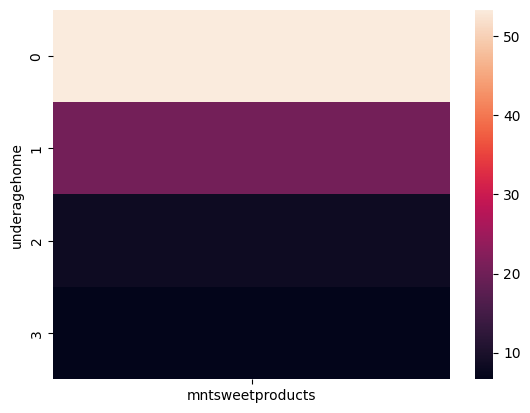

In [ ]:
sns.heatmap(mdf.pivot_table(index=['underagehome'], values='mntsweetproducts', aggfunc='mean'))

Llama la atención la distinción en esta área, debido a que se realiza una evaluación de los hogares que tienen niños menores de edad y el consumo de productos dulces. A menor cantidad de niños, menor consumo de este tipo de productos. Esto puede deberse a que, cuando hay niños en el hogar, las familias optan por no incluir productos dulces que puedan afectar la salud de sus hijos, mientras que alternan por opciones más saludables.

**Conclusión general:**

Gracias a la evaluación realizada en la consecución del proyecto e identificar comportamientos entre variables, se sugiere como estrategia de mercado enfocar el objetivo en todas las categorías de edad que cuenten con ingresos altos, incentivando las compras en tiendas, catálogos y por vías web,
